In [1]:
import sklearn
from sklearn.datasets import make_circles

In [2]:
#Make 1000 samples
n_samples = 1000

X, y = make_circles(n_samples,        #sample number
                    noise=0.05,       #add randomness to our data
                    random_state=42) #same as random seed

In [3]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")
# First 5 samples of X: [[ 0.75424625  0.23148074]   2 features of X for every y
#  [-0.75615888  0.15325888]
#  [-0.81539193  0.17328203]
#  [-0.39373073  0.69288277]
#  [ 0.44220765 -0.89672343]]
# First 5 samples of y: [1 1 1 1 0]       y is binary

First 5 samples of X: [[ 0.74220688  0.24668576]
 [-0.7340323   0.16869164]
 [-0.82985872  0.22195899]
 [-0.42913559  0.67223019]
 [ 0.44560223 -0.89493556]]
First 5 samples of y: [1 1 1 1 0]


In [4]:
#Make dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                        "label": y})
circles.head(10)
# 0.7542462506997276,0.23148073787097836,1
# -0.7561588822214413,0.15325887663494678,1
# -0.8153919335251194,0.17328202920351576,1
# -0.393730728902315,0.6928827699017868,1
# 0.4422076451826442,-0.8967234339920015,0
# -0.4796463680909052,0.6764347685615512,1
# -0.01364835948765009,0.8033487191694424,1
# 0.771513273784567,0.14775958770972614,1
# -0.1693223397310359,-0.7934557525393878,1
# -0.12148579609572473,1.0215090535090692,0

,X1,X2,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0
5,-0.469885,0.708037,1
6,-0.016045,0.805623,1
7,0.759623,0.159526,1
8,-0.175692,-0.799837,1
9,-0.110616,1.042207,0


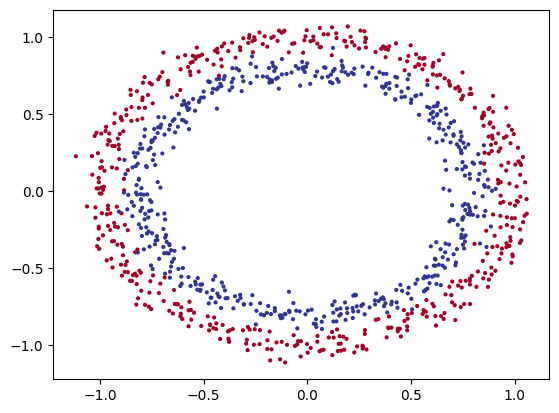

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],  #x coords are 1st col of X
            y=X[:, 1],  #y coords are 2nd col of X
            s=4,        #size
            c=y,        #we color the dots based on y col
            cmap=plt.cm.RdYlBu); #set dots to red yellow and blue

In [6]:
X.shape, y.shape
#((1000, 2), (1000,))     x has 2 features, y is just a scalar

((1000, 2), (1000,))

In [7]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample}")
print(f"Values for one sample of y: {y_sample}")

Values for one sample of X: [0.74220688 0.24668576]
Values for one sample of y: 1


In [8]:
# Turn data into Tensors
import torch
X = torch.from_numpy(X).type(torch.float) #default  for torch is is float 32,
y = torch.from_numpy(y).type(torch.float) #default for numpy is float64

X[:5], y[:5]
# (tensor([[ 0.7422,  0.2467],
#          [-0.7340,  0.1687],
#          [-0.8299,  0.2220],
#          [-0.4291,  0.6722],
#          [ 0.4456, -0.8949]]),
#  tensor([1., 1., 1., 1., 0.]))

(tensor([[ 0.7422,  0.2467],
         [-0.7340,  0.1687],
         [-0.8299,  0.2220],
         [-0.4291,  0.6722],
         [ 0.4456, -0.8949]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
# Split data into training and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #20% of data is test
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [10]:
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [11]:
from sklearn import datasets
# 1 Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2,   # number of features in X
                                 out_features=5)  # arbitrary
        self.layer_2 = nn.Linear(in_features=5,   # output from above is passed in
                                 out_features=1)  # prediction for y is returned
    # 3. Define a forward method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) #layer 2 is passed in layer 1 which is passed in X

# 4. Instatiate an instance of ouor model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [12]:
next(model_0.parameters())
# Parameter containing:
# tensor([[ 0.6906,  0.2828],
#         [-0.4356,  0.6881],
#         [ 0.2373,  0.3026],
#         [-0.1352,  0.1721],
#         [ 0.1612, -0.4702]], requires_grad=True)

Parameter containing:
tensor([[ 0.5173, -0.6640],
        [-0.2482,  0.5712],
        [ 0.4953, -0.0427],
        [-0.3217,  0.5558],
        [ 0.0697, -0.4490]], requires_grad=True)

In [13]:
# Lets replicate the above model using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0
# Sequential(
#   (0): Linear(in_features=2, out_features=5, bias=True)
#   (1): Linear(in_features=5, out_features=1, bias=True)
# )

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
next(model_0.parameters())

Parameter containing:
tensor([[-0.2946, -0.1114],
        [-0.1647, -0.0017],
        [ 0.5953, -0.0903],
        [ 0.3167, -0.4985],
        [ 0.1464, -0.6702]], requires_grad=True)

In [15]:
# Make some predictions
model_0.state_dict()
# OrderedDict([('0.weight',     2 weight and bias tensors
#               tensor([[ 0.0057, -0.0453],
#                       [ 0.1261,  0.3403],
#                       [ 0.2177,  0.3748],
#                       [ 0.2893, -0.1224],
#                       [-0.3013,  0.2374]])),
#              ('0.bias', tensor([ 0.5627, -0.0750,  0.3069, -0.6305, -0.3226])),
#              ('1.weight',
#               tensor([[-0.0556, -0.2433,  0.1876,  0.3159, -0.3312]])),
#              ('1.bias', tensor([-0.3915]))])

OrderedDict([('0.weight',
              tensor([[-0.2946, -0.1114],
                      [-0.1647, -0.0017],
                      [ 0.5953, -0.0903],
                      [ 0.3167, -0.4985],
                      [ 0.1464, -0.6702]])),
             ('0.bias', tensor([ 0.0927, -0.6100, -0.4423, -0.1529,  0.6308])),
             ('1.weight', tensor([[0.1392, 0.1787, 0.1023, 0.4072, 0.1692]])),
             ('1.bias', tensor([-0.4270]))])

In [16]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of Predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")
# Length of Predictions: 200, Shape: torch.Size([200, 1])
# Length of test samples: 200, Shape: torch.Size([200, 2])
#
# First 10 predictions:
# tensor([[-0.5978],
#         [-0.5462],
#         [-0.5385],
#         [-0.6152],
#         [-0.2614],
#         [-0.2321],
#         [-0.3313],
#         [-0.2592],
#         [-0.5429],
#         [-0.5515]])
#
# First 10 labels:
# tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

Length of Predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.8062],
        [-0.8344],
        [-0.5192],
        [-0.8958],
        [-0.1989],
        [-0.2223],
        [-0.5812],
        [-0.4429],
        [-0.5117],
        [-0.8441]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [17]:
# Setup loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss() #sigmoid activation function e.g. 0 to 1

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)

In [18]:
# Calculate accuracy - out of 100 examples, what percentage do we get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()  #sums the equivalencies between the tensors
    acc = (correct / len(y_true)) * 100
    return acc

In [19]:
# View the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))
len(y_logits)
# 0,-0.59783
# 1,-0.54622
# 2,-0.53848
# 3,-0.61515
# 4,-0.26140


200

In [20]:
y_pred_probs = torch.sigmoid(y_logits)[:5]
y_pred_probs
# 0,0.35484
# 1,0.36674
# 2,0.36854
# 3,0.35089
torch.round(y_pred_probs)
# 0,0.0
# 1,0.0
# 2,0.0
# 3,0.0

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [21]:
y_preds = torch.round(y_pred_probs)

# pass X_test through our model, send it through the sigmoid, and round it
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze(), y_pred_labels.squeeze()

#tensor([True, True, True, True, True])

tensor([True, True, True, True, True])


(tensor([0., 0., 0., 0., 0.]),
 tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>))

In [22]:
torch.manual_seed(42)

#Put data to target device
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    model_0.train()
    #1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits into pred probabilities into pred labels

    #2. Calc loss and accuracy
    loss = loss_fn(y_logits, # Because we are using BCEWithLogitsLoss,
                             # we must pass in logits and NOT probabilities
                             # like normal. This combines the sigmoud with BCE loss
                   y_train)
    acc = accuracy_fn(y_true=y_train,  # This is our own testing function that we made
                      y_pred=y_pred)   # earlier

    # 3. Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Back propagation
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the test loss / accuracy
        test_loss = loss_fn(test_logits,          # in Torch, we always pass in the test
                            y_test)               # followed by the training data
        test_acc = accuracy_fn(y_true=y_test,     # in scikit-learn, which our function
                               y_pred=test_pred)  # seeks to mimic, we pass the training data
                                                  # followed by the prediction data
    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss: .5f} | Test Acc: {test_acc:.2f}")
# Epoch: 0 | Loss: 0.69812 | Acc: 55.25 | Test Loss:  0.70413 | Test Acc: 49.00
# Epoch: 10 | Loss: 0.69780 | Acc: 55.12 | Test Loss:  0.70377 | Test Acc: 49.00
# Epoch: 20 | Loss: 0.69752 | Acc: 55.25 | Test Loss:  0.70343 | Test Acc: 48.50
# Epoch: 30 | Loss: 0.69725 | Acc: 54.75 | Test Loss:  0.70312 | Test Acc: 49.50
# Epoch: 40 | Loss: 0.69701 | Acc: 54.50 | Test Loss:  0.70284 | Test Acc: 49.00
# Epoch: 50 | Loss: 0.69678 | Acc: 54.37 | Test Loss:  0.70257 | Test Acc: 48.50
# Epoch: 60 | Loss: 0.69657 | Acc: 53.75 | Test Loss:  0.70232 | Test Acc: 49.00
# Epoch: 70 | Loss: 0.69638 | Acc: 53.75 | Test Loss:  0.70209 | Test Acc: 48.50
# Epoch: 80 | Loss: 0.69620 | Acc: 53.75 | Test Loss:  0.70188 | Test Acc: 49.00
# Epoch: 90 | Loss: 0.69604 | Acc: 53.25 | Test Loss:  0.70168 | Test Acc: 48.50

Epoch: 0 | Loss: 0.73458 | Acc: 50.00 | Test Loss:  0.72989 | Test Acc: 50.00
Epoch: 10 | Loss: 0.73130 | Acc: 50.00 | Test Loss:  0.72644 | Test Acc: 50.00
Epoch: 20 | Loss: 0.72834 | Acc: 50.00 | Test Loss:  0.72333 | Test Acc: 50.00
Epoch: 30 | Loss: 0.72568 | Acc: 50.00 | Test Loss:  0.72051 | Test Acc: 50.00
Epoch: 40 | Loss: 0.72327 | Acc: 50.00 | Test Loss:  0.71797 | Test Acc: 50.00
Epoch: 50 | Loss: 0.72111 | Acc: 50.00 | Test Loss:  0.71566 | Test Acc: 50.00
Epoch: 60 | Loss: 0.71915 | Acc: 50.00 | Test Loss:  0.71358 | Test Acc: 50.00
Epoch: 70 | Loss: 0.71738 | Acc: 48.38 | Test Loss:  0.71169 | Test Acc: 49.50
Epoch: 80 | Loss: 0.71578 | Acc: 46.25 | Test Loss:  0.70998 | Test Acc: 49.50
Epoch: 90 | Loss: 0.71433 | Acc: 44.00 | Test Loss:  0.70843 | Test Acc: 47.00
Epoch: 100 | Loss: 0.71302 | Acc: 41.88 | Test Loss:  0.70703 | Test Acc: 45.00
Epoch: 110 | Loss: 0.71183 | Acc: 41.75 | Test Loss:  0.70575 | Test Acc: 43.50
Epoch: 120 | Loss: 0.71075 | Acc: 42.38 | Test Loss

In [23]:
# 4. Visualize
import requests
from pathlib import Path

# Download helper functions from Learn Pytorch Repo. Get the info at the link, create our file
# with write permissions, and then write the contents of the request
if not Path("helper_functions.py").is_file():
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

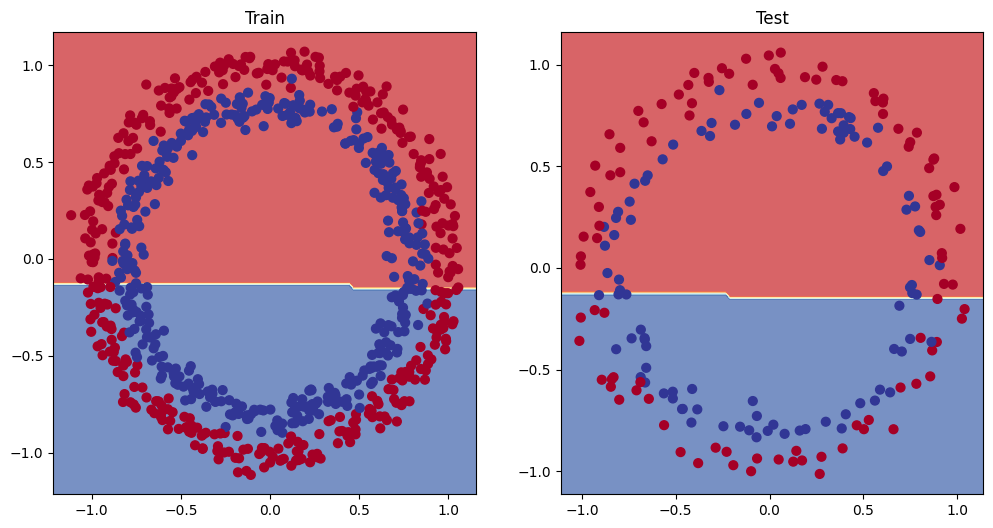

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)  #rows, cols, slot in plot
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [25]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return(self.layer_3(self.layer_2(self.layer_1(x))))

model_1 = CircleModelV1().to(device)
model_1
# CircleModelV1(
#   (layer_1): Linear(in_features=2, out_features=10, bias=True)
#   (layer_2): Linear(in_features=10, out_features=10, bias=True)
#   (layer_3): Linear(in_features=10, out_features=1, bias=True)
# )

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [26]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# and an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [27]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)
epochs = 1000

for epoch in range(epochs):
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> probabilities -> definite labels
    # 2. Loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    # 3-5. Zero grad, backpropagate, step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        #1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: %{acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: %{test_acc:.2f}")
# Epoch: 0 | Loss: 0.71086 | Acc: %50.00 | Test Loss: 0.70705 | Test Acc: %50.00
# Epoch: 100 | Loss: 0.69310 | Acc: %49.00 | Test Loss: 0.69346 | Test Acc: %49.00
# Epoch: 200 | Loss: 0.69300 | Acc: %51.25 | Test Loss: 0.69423 | Test Acc: %47.50
# Epoch: 300 | Loss: 0.69298 | Acc: %51.00 | Test Loss: 0.69450 | Test Acc: %45.50
# Epoch: 400 | Loss: 0.69298 | Acc: %51.25 | Test Loss: 0.69460 | Test Acc: %46.00
# Epoch: 500 | Loss: 0.69298 | Acc: %51.25 | Test Loss: 0.69464 | Test Acc: %46.00
# Epoch: 600 | Loss: 0.69298 | Acc: %51.50 | Test Loss: 0.69466 | Test Acc: %45.50
# Epoch: 700 | Loss: 0.69298 | Acc: %51.50 | Test Loss: 0.69466 | Test Acc: %45.50
# Epoch: 800 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
# Epoch: 900 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50


Epoch: 0 | Loss: 0.69393 | Acc: %51.00 | Test Loss: 0.69264 | Test Acc: %50.00
Epoch: 100 | Loss: 0.69305 | Acc: %50.50 | Test Loss: 0.69379 | Test Acc: %48.00
Epoch: 200 | Loss: 0.69299 | Acc: %51.12 | Test Loss: 0.69436 | Test Acc: %47.00
Epoch: 300 | Loss: 0.69298 | Acc: %51.00 | Test Loss: 0.69456 | Test Acc: %46.00
Epoch: 400 | Loss: 0.69298 | Acc: %51.38 | Test Loss: 0.69463 | Test Acc: %45.50
Epoch: 500 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69465 | Test Acc: %45.50
Epoch: 600 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
Epoch: 700 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
Epoch: 800 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
Epoch: 900 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50


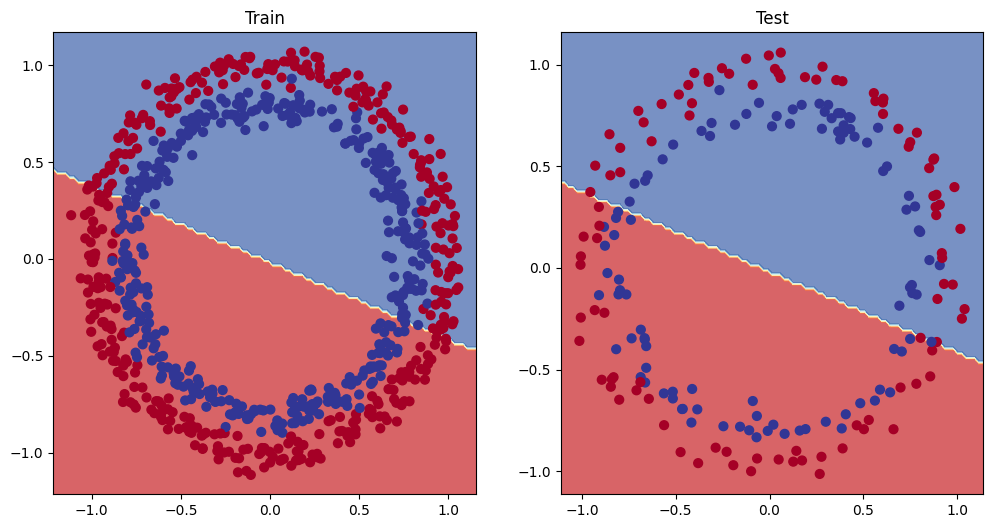

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)  #rows, cols, slot in plot
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [29]:
# Prep data to see if our model is even working at all for anything

In [30]:
# Create some data to make sure model is working
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [31]:
train_split = int(len(X_regression) * 0.8)
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

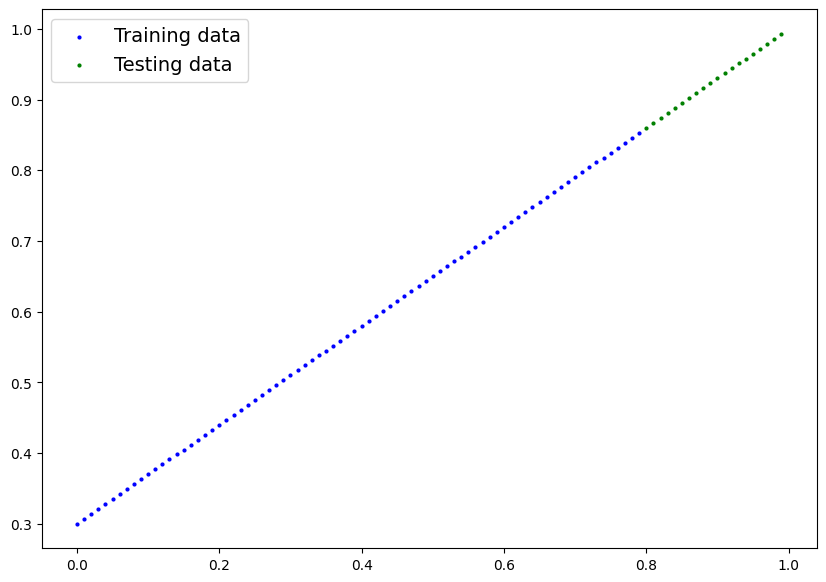

In [32]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [33]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
# Adjusting model_1 to fit a straight line
# right now, it takes in 2 input features. It only needs to take in one
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr=0.001)

In [35]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)

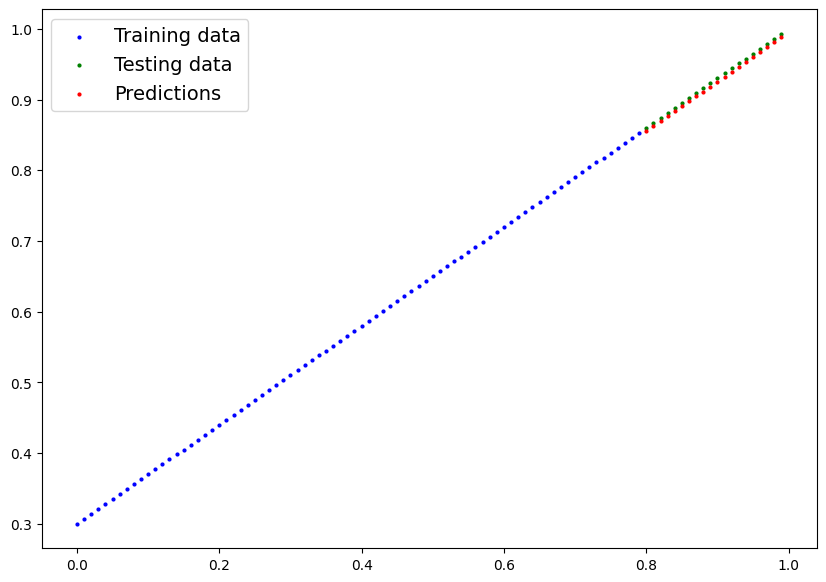

In [36]:
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)

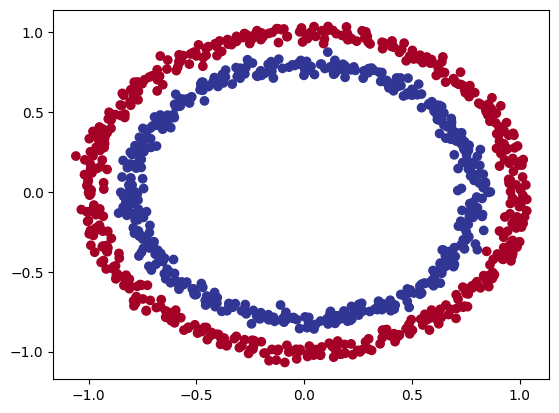

In [37]:
#re initialize data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [38]:
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]
# (tensor([[ 0.6579, -0.4651],
#          [ 0.6319, -0.7347],
#          [-1.0086, -0.1240],
#          [-0.9666, -0.2256],
#          [-0.1666,  0.7994]]),
#  tensor([1., 0., 0., 0., 1.]))

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [39]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self,x):
        # Pass each layer through relu function
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)

In [40]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.01)

In [41]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 10000

for epoch in range(epochs):
    model_3.train()
    # 1.Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> probabilities -> labels
    # 2.Calculate Loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train,
                      y_pred = y_pred)
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss Backward
    loss.backward()
    # 5. Step Optimizer
    optimizer.step()

    # Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test,
                               y_pred = test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.2f}% | Test Loss {test_loss: .4f} | Test Accuracy {test_acc:.2f}")
# Epoch: 0 | Loss: 0.5675 | Accuracy: 88.00% | Test Loss  0.5732 | Test Accuracy 86.50
# Epoch: 100 | Loss: 0.4805 | Accuracy: 93.50% | Test Loss  0.4985 | Test Accuracy 90.50
# Epoch: 200 | Loss: 0.3694 | Accuracy: 97.88% | Test Loss  0.4049 | Test Accuracy 92.50
# Epoch: 300 | Loss: 0.2536 | Accuracy: 99.00% | Test Loss  0.3023 | Test Accuracy 96.50
# Epoch: 400 | Loss: 0.1712 | Accuracy: 99.50% | Test Loss  0.2204 | Test Accuracy 97.50
# Epoch: 500 | Loss: 0.1215 | Accuracy: 99.75% | Test Loss  0.1647 | Test Accuracy 99.00
# Epoch: 600 | Loss: 0.0910 | Accuracy: 99.88% | Test Loss  0.1271 | Test Accuracy 99.50
# Epoch: 700 | Loss: 0.0708 | Accuracy: 99.88% | Test Loss  0.1030 | Test Accuracy 99.50
# Epoch: 800 | Loss: 0.0576 | Accuracy: 99.88% | Test Loss  0.0866 | Test Accuracy 99.50
# Epoch: 900 | Loss: 0.0484 | Accuracy: 99.88% | Test Loss  0.0746 | Test Accuracy 99.50

Epoch: 0 | Loss: 0.6929 | Accuracy: 50.00% | Test Loss  0.6932 | Test Accuracy 50.00
Epoch: 100 | Loss: 0.6925 | Accuracy: 50.38% | Test Loss  0.6926 | Test Accuracy 50.00
Epoch: 200 | Loss: 0.6922 | Accuracy: 59.00% | Test Loss  0.6923 | Test Accuracy 56.00
Epoch: 300 | Loss: 0.6921 | Accuracy: 70.12% | Test Loss  0.6921 | Test Accuracy 67.00
Epoch: 400 | Loss: 0.6919 | Accuracy: 68.38% | Test Loss  0.6920 | Test Accuracy 70.00
Epoch: 500 | Loss: 0.6918 | Accuracy: 58.50% | Test Loss  0.6918 | Test Accuracy 62.00
Epoch: 600 | Loss: 0.6917 | Accuracy: 54.00% | Test Loss  0.6916 | Test Accuracy 56.00
Epoch: 700 | Loss: 0.6915 | Accuracy: 53.25% | Test Loss  0.6915 | Test Accuracy 53.00
Epoch: 800 | Loss: 0.6914 | Accuracy: 52.62% | Test Loss  0.6913 | Test Accuracy 53.00
Epoch: 900 | Loss: 0.6913 | Accuracy: 52.75% | Test Loss  0.6912 | Test Accuracy 53.00
Epoch: 1000 | Loss: 0.6912 | Accuracy: 53.00% | Test Loss  0.6910 | Test Accuracy 52.50
Epoch: 1100 | Loss: 0.6910 | Accuracy: 52.88

In [42]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]
# (tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
#  tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

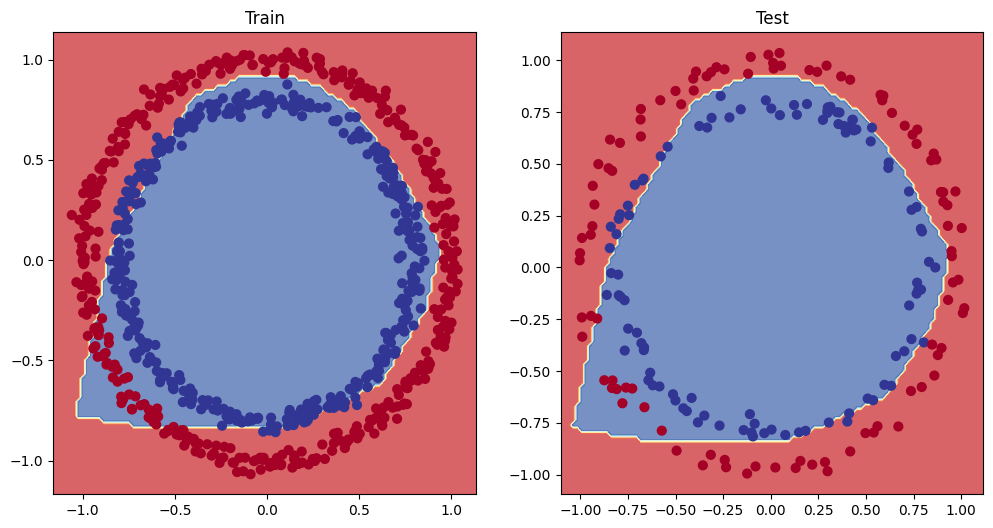

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)


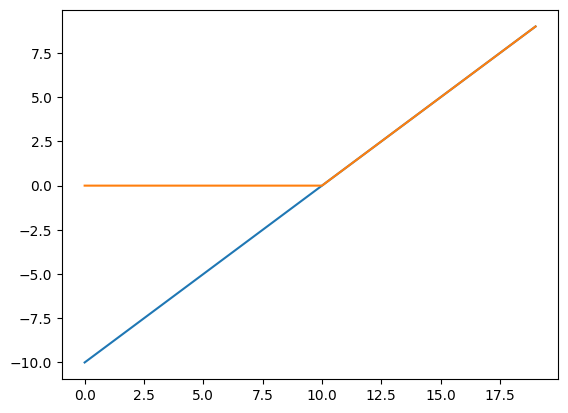

In [48]:
A = torch.arange(-10,10,1)
plt.plot(A)
plt.plot(torch.relu(A))

In [49]:
def relu(x): #Handmaking ReLU function
    return torch.maximum(torch.tensor(0), x)

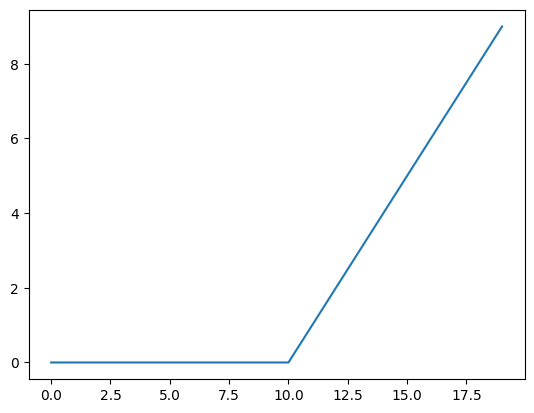

In [50]:
plt.plot(relu(A))

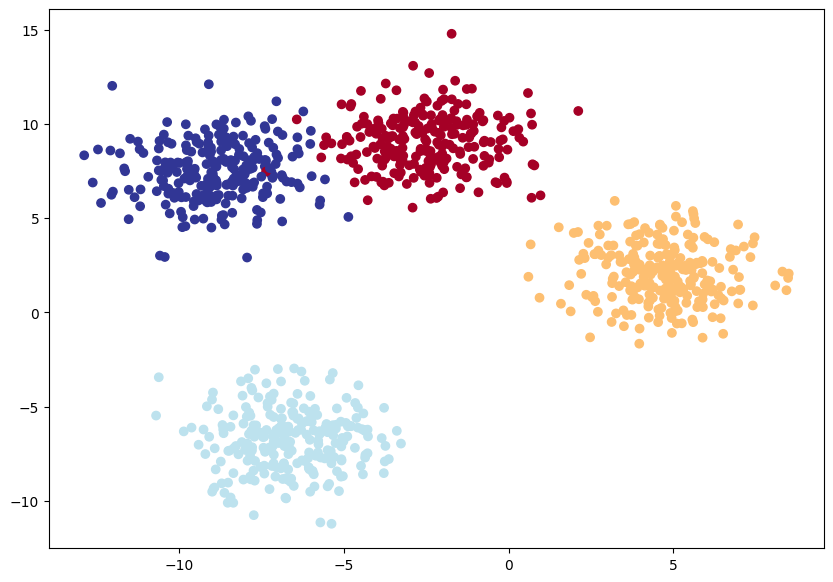

In [57]:
# Create toy dataset
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features=NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [81]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [78]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

In [82]:
model_4(X_blob_train.to(device))[:5]

tensor([[-0.3778, -0.1233,  0.2456,  0.0112],
        [ 0.5366,  0.7286,  0.1777, -0.7184],
        [ 0.5755,  1.2356,  0.8522,  0.7674],
        [ 0.4663,  1.0002,  0.6680,  0.4240],
        [ 0.5397,  0.7897,  0.2613, -0.5332]], grad_fn=<SliceBackward0>)

In [83]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

In [84]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

In [88]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
# tensor([[-0.3084, -0.0762,  0.2150, -0.1012],
#         [ 0.9781,  1.2811,  0.3481, -0.6156],
#         [ 0.3933,  1.0054,  0.7786,  0.7176],
#         [-0.3079,  0.0070,  0.3342,  0.1654],
#         [ 0.3158,  0.4694,  0.1171, -0.7146]], grad_fn=<SliceBackward0>)
# tensor([[0.1931, 0.2435, 0.3259, 0.2375],
#         [0.3237, 0.4382, 0.1724, 0.0658],
#         [0.1755, 0.3237, 0.2580, 0.2428],
#         [0.1702, 0.2332, 0.3234, 0.2732],
#         [0.2992, 0.3488, 0.2453, 0.1068]], grad_fn=<SliceBackward0>)

tensor([[-0.3084, -0.0762,  0.2150, -0.1012],
        [ 0.9781,  1.2811,  0.3481, -0.6156],
        [ 0.3933,  1.0054,  0.7786,  0.7176],
        [-0.3079,  0.0070,  0.3342,  0.1654],
        [ 0.3158,  0.4694,  0.1171, -0.7146]], grad_fn=<SliceBackward0>)
tensor([[0.1931, 0.2435, 0.3259, 0.2375],
        [0.3237, 0.4382, 0.1724, 0.0658],
        [0.1755, 0.3237, 0.2580, 0.2428],
        [0.1702, 0.2332, 0.3234, 0.2732],
        [0.2992, 0.3488, 0.2453, 0.1068]], grad_fn=<SliceBackward0>)


In [89]:
#Convert to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 2, 1, 2])